# Visualization using matplotlib and seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.mlab import normpdf

%matplotlib inline


In [2]:
df = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Auto.data", 
                 sep=r"\s+")

In [3]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null float64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB


In [5]:
np.unique(df["year"])

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

# Visualization for a single continuous variable

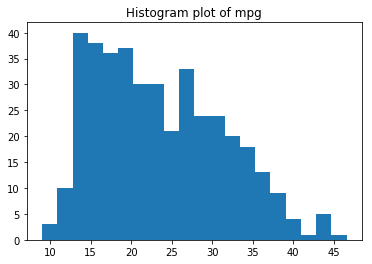

In [6]:
plt.hist(df["mpg"], bins = 20)
plt.title("Histogram plot of mpg")

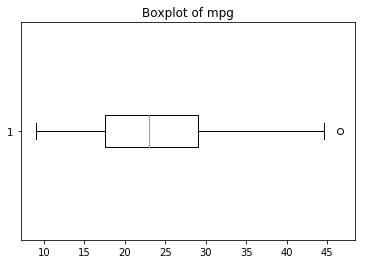

In [7]:
plt.boxplot(df["mpg"], vert=False)
plt.title("Boxplot of mpg")

In [8]:
df.query("mpg < 40 and mpg > 35").shape[0]

25

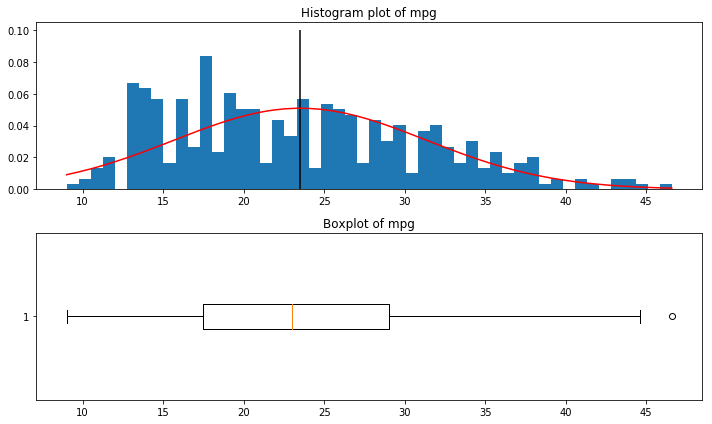

In [9]:
plt.figure(figsize = (10, 6))
plt.subplot(2, 1, 1)
n, bins, patches = plt.hist(df["mpg"], bins = 50, normed = True)
plt.title("Histogram plot of mpg")

pdf = normpdf(bins, df["mpg"].mean(), df["mpg"].std())
plt.plot(bins, pdf, ls = "-", color = "red")

plt.vlines([df["mpg"].mean()], ymin=0, ymax=0.1)

plt.subplot(2, 1, 2)
plt.boxplot(df["mpg"], vert=False)
plt.title("Boxplot of mpg")
plt.tight_layout()

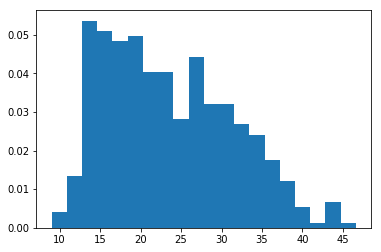

In [10]:
n, bins, patches = plt.hist(df["mpg"], bins = 20, normed = True)

In [11]:
bins

array([  9.  ,  10.88,  12.76,  14.64,  16.52,  18.4 ,  20.28,  22.16,
        24.04,  25.92,  27.8 ,  29.68,  31.56,  33.44,  35.32,  37.2 ,
        39.08,  40.96,  42.84,  44.72,  46.6 ])

In [12]:
normpdf(bins, df["mpg"].mean(), df["mpg"].std())

array([ 0.00912588,  0.01384406,  0.01982389,  0.02679481,  0.03418606,
        0.04117028,  0.046801  ,  0.0502184 ,  0.0508636 ,  0.04862815,
        0.04388387,  0.03738166,  0.03005722,  0.02281263,  0.01634325,
        0.01105193,  0.00705463,  0.00425056,  0.00241744,  0.00129778,
        0.00065763])

In [13]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
324,40.8,4,85.0,65.00,2110.0,19.2,80,3,datsun 210
257,19.4,6,232.0,90.00,3210.0,17.2,78,1,amc concord
172,25.0,4,90.0,71.00,2223.0,16.5,75,2,volkswagen dasher
366,17.6,6,225.0,85.00,3465.0,16.6,81,1,chrysler lebaron salon
28,9.0,8,304.0,193.0,4732.0,18.5,70,1,hi 1200d
122,24.0,4,121.0,110.0,2660.0,14.0,73,2,saab 99le
368,27.0,4,112.0,88.00,2640.0,18.6,82,1,chevrolet cavalier wagon
88,14.0,8,302.0,137.0,4042.0,14.5,73,1,ford gran torino
119,20.0,4,114.0,91.00,2582.0,14.0,73,2,audi 100ls
96,13.0,8,360.0,175.0,3821.0,11.0,73,1,amc ambassador brougham


# Visualization for single categorical variable

In [14]:
counts = df["year"].value_counts()

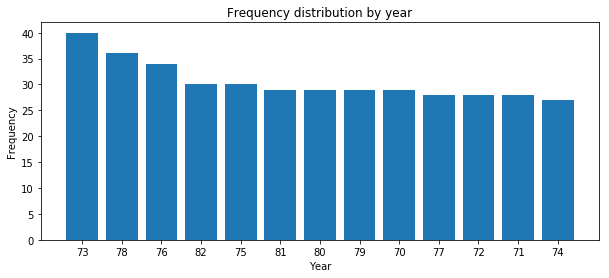

In [15]:
plt.figure(figsize = (10, 4))
plt.bar(range(len(counts)), counts, align = "center")
plt.xticks(range(len(counts)), counts.index)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Frequency distribution by year")

In [16]:
mpg_by_year = df.groupby("year")["mpg"].\
agg([np.median, np.std]).reset_index()

mpg_by_year

,year,median,std
0,70,16.00,5.339231
1,71,19.00,6.591942
2,72,18.50,5.435529
3,73,16.00,4.700245
4,74,24.00,6.420010
5,75,19.50,4.940566
6,76,21.00,5.889297
7,77,21.75,6.675862
8,78,20.70,6.898044
9,79,23.90,6.794217


In [17]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
162,15.0,6,258.0,110.0,3730.0,19.0,75,1,amc matador
138,14.0,8,318.0,150.0,4457.0,13.5,74,1,dodge coronet custom (sw)
124,11.0,8,350.0,180.0,3664.0,11.0,73,1,oldsmobile omega
320,37.0,4,119.0,92.00,2434.0,15.0,80,3,datsun 510 hatchback
19,26.0,4,97.0,46.00,1835.0,20.5,70,2,volkswagen 1131 deluxe sedan
85,13.0,8,350.0,175.0,4100.0,13.0,73,1,buick century 350
159,14.0,8,351.0,148.0,4657.0,13.5,75,1,ford ltd
279,29.5,4,98.0,68.00,2135.0,16.6,78,3,honda accord lx
337,32.4,4,107.0,72.00,2290.0,17.0,80,3,honda accord
220,33.5,4,85.0,70.00,1945.0,16.8,77,3,datsun f-10 hatchback


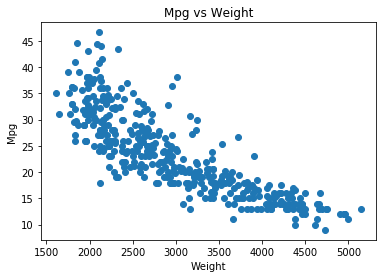

In [18]:
plt.scatter(df["weight"], df["mpg"])
plt.xlabel("Weight")
plt.ylabel("Mpg")
plt.title("Mpg vs Weight")

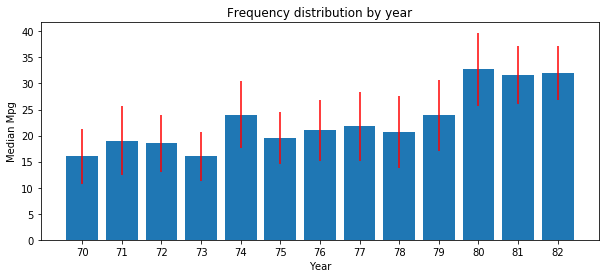

In [19]:
plt.figure(figsize = (10, 4))
plt.bar(range(mpg_by_year.shape[0]), mpg_by_year["median"],
        align = "center", yerr = mpg_by_year["std"], ecolor = "red")
plt.xticks(range(mpg_by_year.shape[0]), mpg_by_year["year"])
plt.xlabel("Year")
plt.ylabel("Median Mpg")
plt.title("Frequency distribution by year")

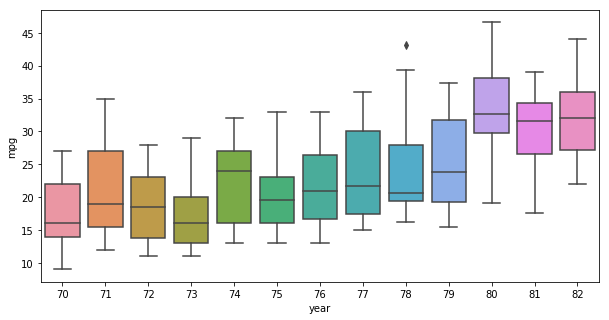

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot("year", "mpg", data = df)

In [21]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [22]:
aggr = df.groupby(["cylinders", "year"])["mpg"].\
agg([np.mean, np.std]).reset_index()

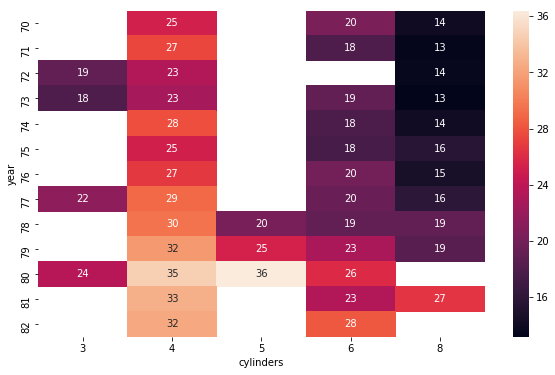

In [23]:
plt.figure(figsize = (10, 6))
sns.heatmap(aggr.pivot("year", "cylinders", "mean"), annot=True)

In [24]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
data = pd.read_csv(url, header=None, dtype=np.float64)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0
1,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0
2,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0
3,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0
4,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0
5,1.0,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0
6,1.0,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0
7,1.0,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0
8,1.0,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0
9,1.0,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0


In [25]:
data.columns = [
    "Class",
"Alcohol",
"Malic acid",
"Ash",
"Alcalinity of ash",  
"Magnesium",
"Total phenols",
"Flavanoids",
"Nonflavanoid phenols",
"Proanthocyanins",
"Color intensity",
"Hue",
"OD280/OD315 of diluted wines",
"Proline"
]

In [26]:
data.corr()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


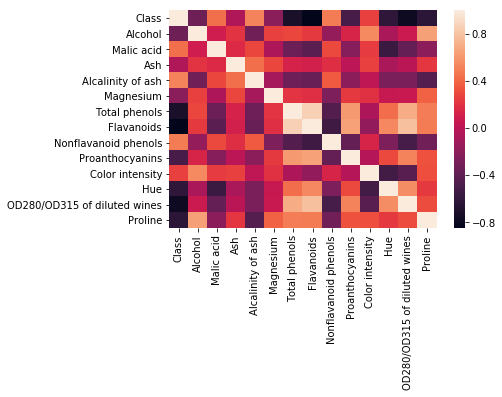

In [27]:
sns.heatmap(data.corr())

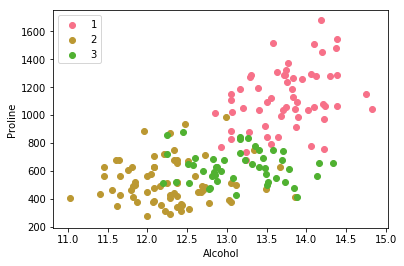

In [28]:
colors = sns.color_palette("husl")#["red", "blue", "green"]
markers = ["s", "o", "x"]
for i, cls in enumerate([1, 2, 3]):
    d1 = data[data.Class == cls]
    plt.scatter(d1["Alcohol"], d1["Proline"], 
                marker = "o", color = colors[i], label = cls)
    plt.xlabel("Alcohol")
    plt.ylabel("Proline")
plt.legend(loc = "upper left")

In [29]:
housing = pd.read_csv("../data/kaggle-house-prices/train.csv")

In [30]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [31]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [32]:
categorical_columns = housing.select_dtypes(exclude=[np.float64, np.int64]).columns

# Exercise 2:

1. plot SalePrice 
2. show the median SalePrice against YrSold
3. inpute the NaN with median
4. plot heatmap of correlation among the numeric features ... find which features are highly( >0.6) correlated with SalePrice 

Hint: 
    housing.select_dtypes(include=[np.float64, np.int64]).info()

In [33]:
for col in categorical_columns:
    housing[col] = housing[col].fillna(col + ":None")

In [34]:
housing[housing["Alley"] == "MSZoning:None"]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [35]:
housing.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley            1460
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1460
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
                 ... 
BedroomAbvGr     1460
KitchenAbvGr     1460
KitchenQual      1460
TotRmsAbvGrd     1460
Functional       1460
Fireplaces       1460
FireplaceQu      1460
GarageType       1460
GarageYrBlt      1379
GarageFinish     1460
GarageCars       1460
GarageArea       1460
GarageQual       1460
GarageCond       1460
PavedDrive

In [36]:
housing["Alley"].value_counts()

Alley:None    1369
Grvl            50
Pave            41
Name: Alley, dtype: int64

In [37]:
a = np.array([4, 7, 10, 5, 3, 100])
np.median(a), np.mean(a), np.std(a)

(6.0, 21.5, 35.179302627160382)

In [38]:
sorted([4, 7, 10, 5, 3, 100])

[3, 4, 5, 7, 10, 100]

In [39]:
a = np.array([4, 7, 10, 5, 3, 10])
np.median(a), np.mean(a), np.std(a)

(6.0, 6.5, 2.753785273643051)